##### Created on 30 Dec 2022
##### Course work: Implementation of Lagrange's polynomial and draw a plot of the polynomial through your jupyter notebook environment.
##### @author: Sanjjushri

In [7]:
from scipy.interpolate import lagrange
import random
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [8]:
x = []
y = []
x_new = []

for _ in range(3):
    x.append(random.randint(-100, 100))
    y.append(random.randint(-100, 100))  
    x_new.append(random.randint(-100, 100))  

In [9]:
f = lagrange(x, y)

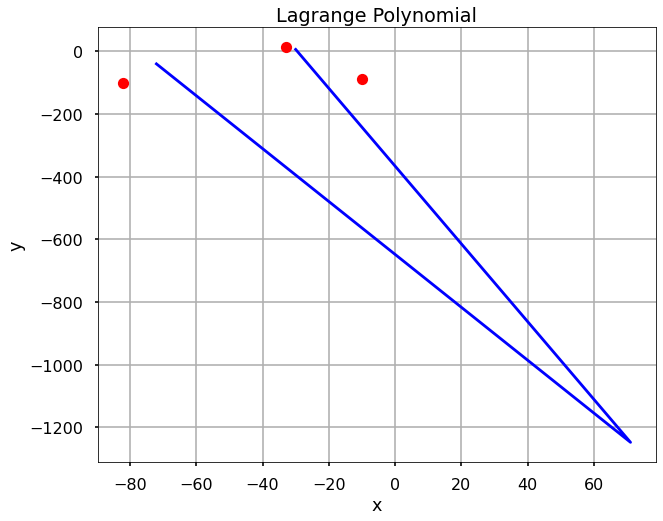

In [10]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()